# Titanic!

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# 讀取數據
train = pd.read_csv("src/train.csv")
test = pd.read_csv("src/test.csv")

**補充**
- 這裡跳過了EDA的過程，是由於AI只會給出最佳解，中間推理的過程會省略，實際在操作時，應該要先做好EDA，再處理特徵。

In [8]:
# 選擇特徵
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
train = train[features + ["Survived"]]
test = test[features]  # 測試集沒有 "Survived" 標籤
# 可以直接train["Sex"]來選取目標列

In [ ]:
# 處理缺失值
for df in [train, test]:  # 同時處理 train 和 test
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Fare"].fillna(df["Fare"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

**邏輯講解**

- `inplace=True` 會直接修改原始 **DataFrame**，邏輯等同於`df["Age"] = df["Age"].fillna(df["Age"].median())`
- `fillna`就是把na值填上特定數值，選用**median**是因為比較不會受極端值影響。
- `mode()` 會回傳一個 **Series**，不一定是單一值，因此如果有多個眾數，`mode()[0]` 會選擇第一個。
- **df**指的是整個**dataframe**，會照著後面的列表中的**dataframe**一一處理na值。

In [10]:
# 轉換類別變數
for df in [train, test]:  # 同時處理 train 和 test
    df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
    df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])
# 需要搞懂fit和transform具體在做甚麼?還有LabelEncoder()的使用方式

In [11]:
# 分割訓練與測試集
X = train.drop("Survived", axis=1)
y = train["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# .drop是甚麼函數?train_test_split的使用方式?參數要怎麼設?

In [ ]:
# 訓練邏輯迴歸模型
model = LogisticRegression()
model.fit(X_train, y_train)

In [13]:
# 驗證模型
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8100558659217877


In [14]:
# **用測試集進行預測**
test_predictions = model.predict(test)

In [15]:
# **生成 Kaggle 提交格式**
submission = pd.DataFrame({"PassengerId": pd.read_csv("src/test.csv")["PassengerId"],
                           "Survived": test_predictions})

# **輸出結果**
submission.to_csv("src/submission.csv", index=False)
print("Submission file saved: submission.csv")

Submission file saved: submission.csv


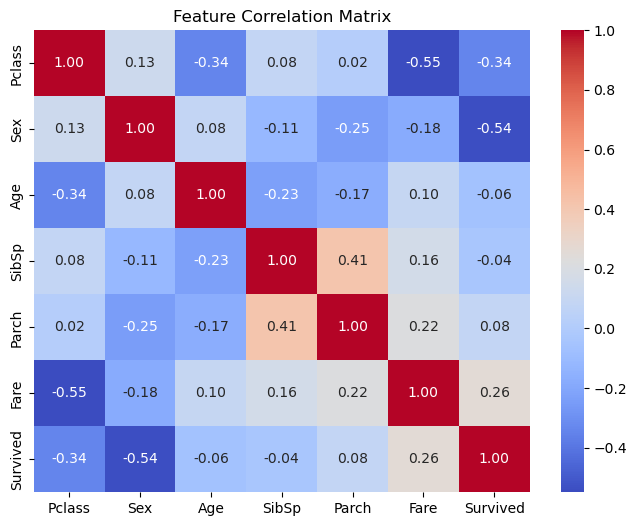

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關係數矩陣
corr_matrix = train.corr()

# 繪製熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()
